In [1]:
import os
path = 'C:/pytest_img/'
os.chdir(path)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_dir = 'C:/pytest_img/seg_train/'
validation_dir = "C:/pytest_img/seg_validation/"
test_dir = "C:/pytest_img/seg_test/"

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(20,20), batch_size =100, class_mode='categorical',
    classes = ['buildings','forest','glacier','mountain','sea','street'])
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,target_size = (20,20), batch_size = 100, class_mode = 'categorical',
    classes = ['buildings','forest','glacier','mountain','sea','street'])
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size= (20,20), batch_size= 100, class_mode= 'categorical',
    classes = ['buildings','forest','glacier','mountain','sea','street'])

Found 11634 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (3,3), input_shape = (20,20,3), activation = 'relu'))
model.add(layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                        

In [8]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [9]:
len(train_generator)

117

In [11]:
with tf.device('/CPU:0'):
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs = 100,
        validation_data = validation_generator,
        validation_steps = len(validation_generator)
    )

Epoch 1/100
117/117 [==============================] - 20s 163ms/step - loss: 1.4317 - acc: 0.4279 - val_loss: 1.1478 - val_acc: 0.5404
Epoch 2/100
117/117 [==============================] - 15s 132ms/step - loss: 1.2077 - acc: 0.5292 - val_loss: 1.1027 - val_acc: 0.5775
Epoch 3/100
117/117 [==============================] - 16s 135ms/step - loss: 1.1488 - acc: 0.5650 - val_loss: 0.9952 - val_acc: 0.6125
Epoch 4/100
117/117 [==============================] - 16s 136ms/step - loss: 1.0949 - acc: 0.5771 - val_loss: 0.8982 - val_acc: 0.6562
Epoch 5/100
117/117 [==============================] - 16s 139ms/step - loss: 1.0628 - acc: 0.6016 - val_loss: 0.9936 - val_acc: 0.6225
Epoch 6/100
117/117 [==============================] - 16s 135ms/step - loss: 1.0407 - acc: 0.6076 - val_loss: 0.9022 - val_acc: 0.6625
Epoch 7/100
117/117 [==============================] - 16s 136ms/step - loss: 1.0353 - acc: 0.6094 - val_loss: 0.8859 - val_acc: 0.6658
Epoch 8/100
117/117 [===========================

Epoch 61/100
117/117 [==============================] - 15s 132ms/step - loss: 0.7876 - acc: 0.7147 - val_loss: 0.6999 - val_acc: 0.7525
Epoch 62/100
117/117 [==============================] - 15s 132ms/step - loss: 0.7836 - acc: 0.7163 - val_loss: 0.7144 - val_acc: 0.7429
Epoch 63/100
117/117 [==============================] - 16s 135ms/step - loss: 0.7886 - acc: 0.7109 - val_loss: 0.7164 - val_acc: 0.7475
Epoch 64/100
117/117 [==============================] - 16s 134ms/step - loss: 0.7804 - acc: 0.7182 - val_loss: 0.6807 - val_acc: 0.7583
Epoch 65/100
117/117 [==============================] - 16s 138ms/step - loss: 0.7869 - acc: 0.7119 - val_loss: 0.6874 - val_acc: 0.7483
Epoch 66/100
117/117 [==============================] - 16s 138ms/step - loss: 0.7752 - acc: 0.7188 - val_loss: 0.6967 - val_acc: 0.7571
Epoch 67/100
117/117 [==============================] - 16s 136ms/step - loss: 0.7910 - acc: 0.7113 - val_loss: 0.6457 - val_acc: 0.7725
Epoch 68/100
117/117 [===================

In [12]:
with tf.device('/CPU:0'):
    test_eval = model.evaluate(test_generator)

30/30 [==============================] - 3s 90ms/step - loss: 0.6546 - acc: 0.7637


In [28]:
import matplotlib.pyplot as plt

In [31]:
epochs = range(1,len(history.history['acc'])+1)

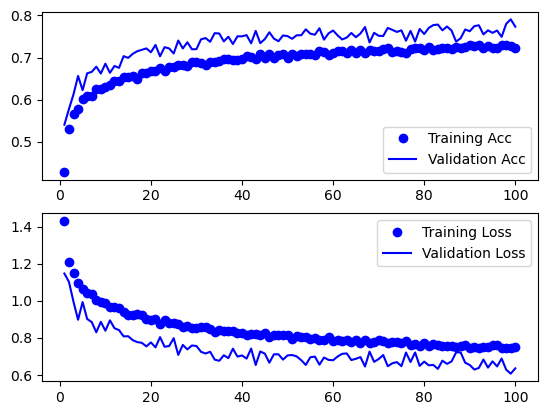

In [32]:
plt.subplot(211)
plt.plot(epochs, history.history['acc'], 'bo', label = 'Training Acc')
plt.plot(epochs, history.history['val_acc'], 'b', label = 'Validation Acc')
plt.legend()

plt.subplot(212)
plt.plot(epochs, history.history['loss'], 'bo', label = 'Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'Validation Loss')
plt.legend()

plt.show()

In [14]:
pred_folder ='C:/pytest_img/seg_pred/'
files = [f for f in os.listdir(pred_folder) if os.path.isfile(os.path.join(pred_folder, f))]

In [16]:
dataset = np.ndarray(shape = (len(files), 20,20,3), dtype = np.int32)

In [22]:
from PIL import Image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tqdm import tqdm
for count, item in tqdm(enumerate(files)):
    img = load_img(pred_folder+files[count])
    img = img.resize((20,20))
    img_array = img_to_array(img)
    dataset[count] = img_array

7301it [00:06, 1143.79it/s]


In [23]:
with tf.device('/CPU:0'):
    prediction = model.predict(dataset)

229/229 [==============================] - 1s 5ms/step


In [24]:
prediction

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
folder = 'C:/pytest_img/'

In [26]:
if not os.path.exists(os.path.join(folder, 'seg_new/')):
    os.makedirs(os.path.join(folder, 'seg_new/'))

In [42]:
classes = ['buildings','forest','glacier','mountain','sea','street']
for i, word in enumerate(prediction):
    img_original = load_img(pred_folder+files[i])
    img_original.save(fp = os.path.join(folder,'seg_new/')+classes[word.argmax()]+files[i])

In [40]:
files[1]

'10005.jpg'